# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [19]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [3]:
imoveis_california = pd.read_csv('housing.csv')
imoveis_california.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
#tratar valores ausentes
imoveis_california.dropna(inplace = True)

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [7]:
#queremos encontrar median_house_value (valor médio da casa)
# caracteristicas que vamos usar
X = imoveis_california[['median_income', 'housing_median_age', 'total_rooms', 'population']]

# Variável alvo que queremos encontrar
y = imoveis_california['median_house_value']


### 3. Separe os dados em validação e teste

In [9]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [11]:
# Treinar árvore com max_depth = 8
modelo_profundidade_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
modelo_profundidade_8.fit(X_train, y_train)



DecisionTreeRegressor(max_depth=8, random_state=42)

In [13]:
# Treinar árvore com max_depth = 2
modelo_profundidade_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
modelo_profundidade_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [21]:
# Previsões com árvore de profundidade 8
pred_train_8 = modelo_profundidade_8.predict(X_train)
pred_test_8 = modelo_profundidade_8.predict(X_test)

# Previsões com árvore de profundidade 2
pred_train_2 = modelo_profundidade_2.predict(X_train)
pred_test_2 = modelo_profundidade_2.predict(X_test)

# MSE para árvore com profundidade 8
mse_train_8 = mean_squared_error(y_train, pred_train_8)
mse_test_8 = mean_squared_error(y_test, pred_test_8)

# MSE para árvore com profundidade 2
mse_train_2 = mean_squared_error(y_train, pred_train_2)
mse_test_2 = mean_squared_error(y_test, pred_test_2)

### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

R. Com base nos resultados apresentados, entendo que a árvore com profundidade 8 apresentou um indice de erro menor, que o de profundidade 2.
Sendo assim parecendo mais adequada.


In [23]:
#O MSE (Mean Squared Error) mede o erro entre os valores reais e os previstos. Quanto menor o MSE, melhor o modelo está prevendo.

# Exibindo os resultados
print("Árvore com Profundidade = 8")
print(f"  MSE Treinamento: {mse_train_8:.2f}")
print(f"  MSE Teste      : {mse_test_8:.2f}")

print("\nÁrvore com Profundidade = 2")
print(f"  MSE Treinamento: {mse_train_2:.2f}")
print(f"  MSE Teste      : {mse_test_2:.2f}")

Árvore com Profundidade = 8
  MSE Treinamento: 5108718539.36
  MSE Teste      : 6468488006.08

Árvore com Profundidade = 2
  MSE Treinamento: 7301485444.05
  MSE Teste      : 7608731340.05


### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

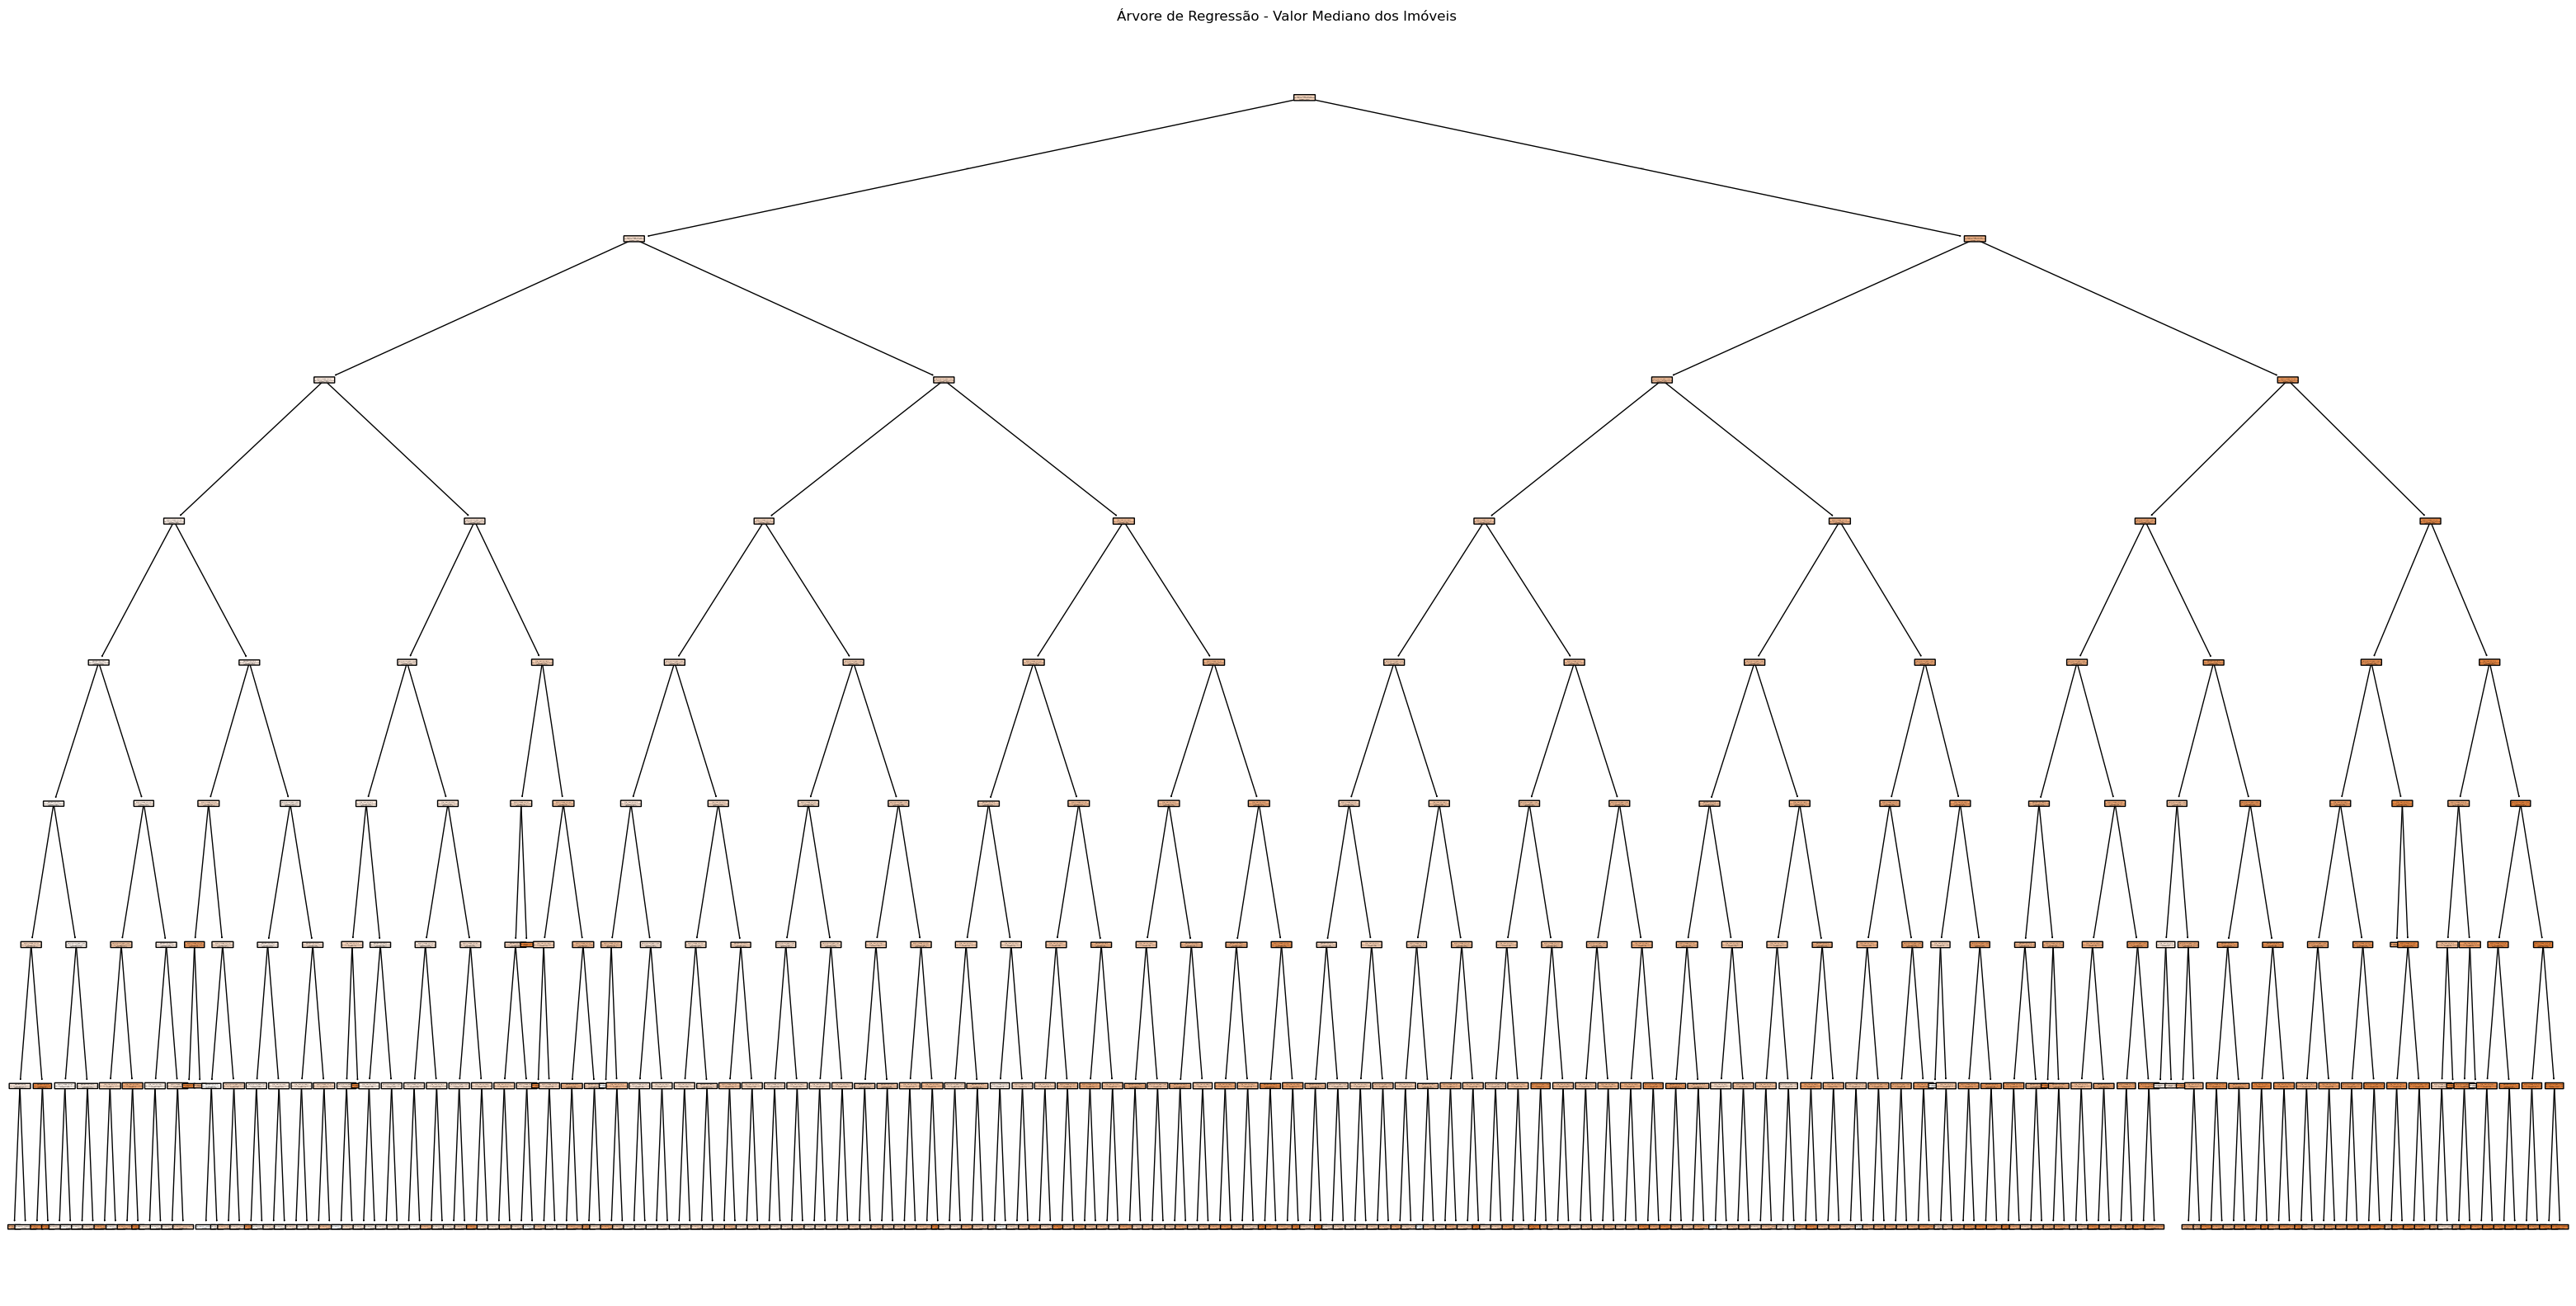

In [55]:
plt.figure(figsize=(40,20))
tree.plot_tree(modelo_profundidade_8, feature_names=X.columns, filled=True, rounded=True)
plt.title("Árvore de Regressão - Valor Mediano dos Imóveis")
plt.show()
